## Fitting drug response curves with sigmoid function

In [1]:
import pandas as pd
import numpy as np


from tqdm import tqdm
import warnings
from fitting import *

warnings.filterwarnings("ignore")
_FOLDER = "data/"
_FOLDER_2 = "figures/"

## Fitting data

In [3]:
df = pd.read_csv("results/filt_1234.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]
df.columns

Index(['CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID', 'DRUGID_COSMICID',
       'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1', 'fd_num_2',
       'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7', 'fd_num_8',
       'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'drug_name', 'CCL_name',
       'dif_first', 'dif_last'],
      dtype='object')

### sigmoid_4_param

In [4]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 2600/2600 [00:07<00:00, 352.75it/s]

<function sigmoid_4_param at 0x7f8971ace730>
R2>0: (2583, 32)
R2>0.9 2563
Number of samples with fitting <0.1: 18

CPU times: user 7.07 s, sys: 265 ms, total: 7.34 s
Wall time: 7.4 s


### sigmoid_2_param

100%|██████████| 2583/2583 [00:04<00:00, 621.96it/s]


<function sigmoid_2_param at 0x7f896f84d268>
R2>0: (2583, 34)
R2>0.9 2359
CPU times: user 4.23 s, sys: 139 ms, total: 4.37 s
Wall time: 4.46 s


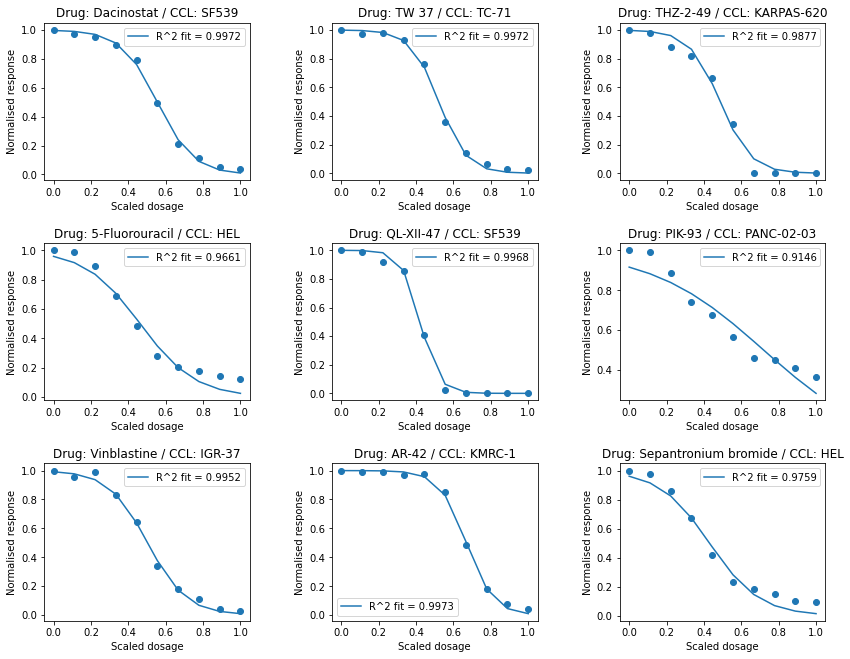

In [7]:
%%time
fitting_function = "sigmoid_2_param" 
# "sigmoid_Wang" we don't need default_param_number
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### sigmoid_3_param

100%|██████████| 2583/2583 [00:06<00:00, 410.99it/s]


<function sigmoid_3_param at 0x7f8971ace488>
R2>0: (2583, 36)
R2>0.9 2561
CPU times: user 6.2 s, sys: 197 ms, total: 6.39 s
Wall time: 6.72 s


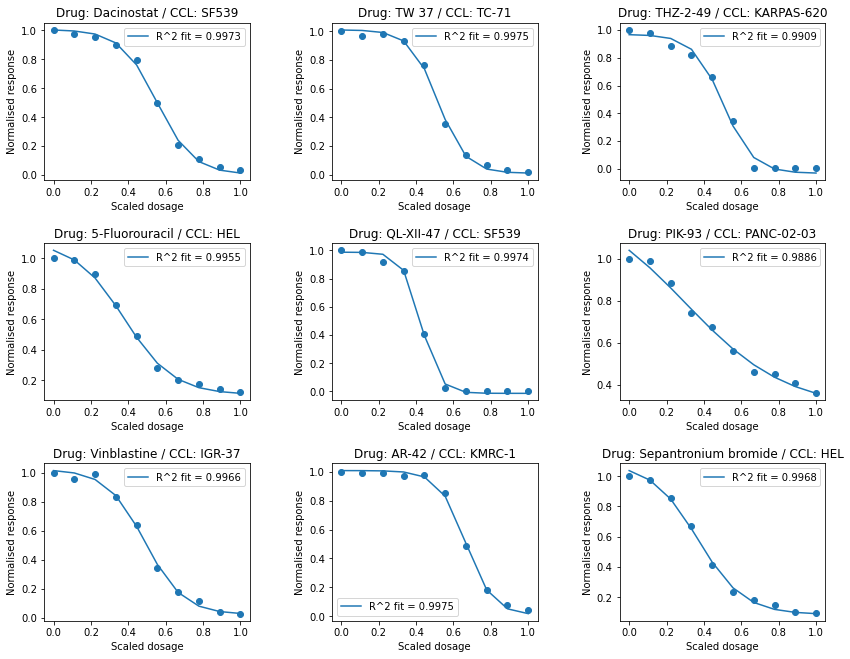

In [8]:
%%time
fitting_function = "sigmoid_3_param"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### fsigmoid

100%|██████████| 2583/2583 [00:04<00:00, 565.31it/s]


<function fsigmoid at 0x7f89719f2158>
(2583, 38)


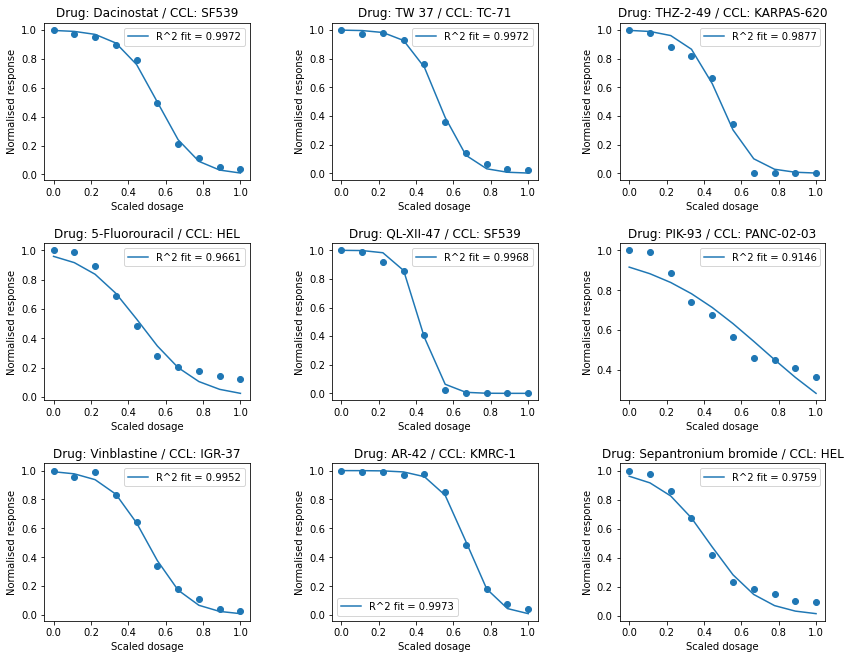

In [9]:
# %%time
fitting_function = "fsigmoid"

r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print(df.shape)

ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logistic_4_param

100%|██████████| 2583/2583 [00:07<00:00, 326.58it/s]


<function logistic_4_param at 0x7f8971ace8c8>
R2>0: (2583, 40)
R2>0.9 2580
CPU times: user 7.64 s, sys: 297 ms, total: 7.93 s
Wall time: 8.18 s


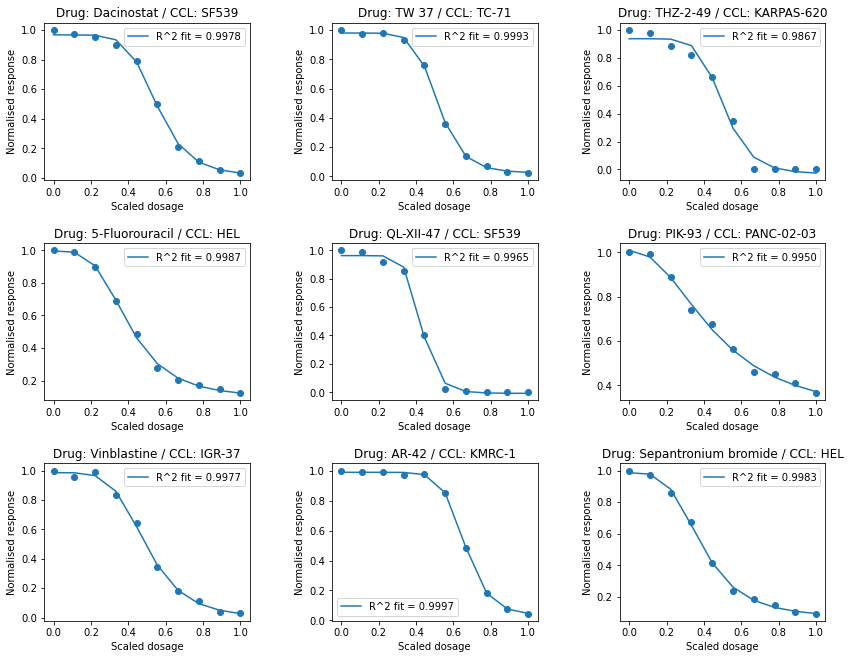

In [10]:
%%time
fitting_function = "logistic_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### LL4_4_param

100%|██████████| 2583/2583 [00:08<00:00, 318.11it/s]


<function ll4_4_param at 0x7f8971ace7b8>
R2>0: (2583, 42)
R2>0.9 2580
CPU times: user 8.18 s, sys: 311 ms, total: 8.49 s
Wall time: 8.39 s


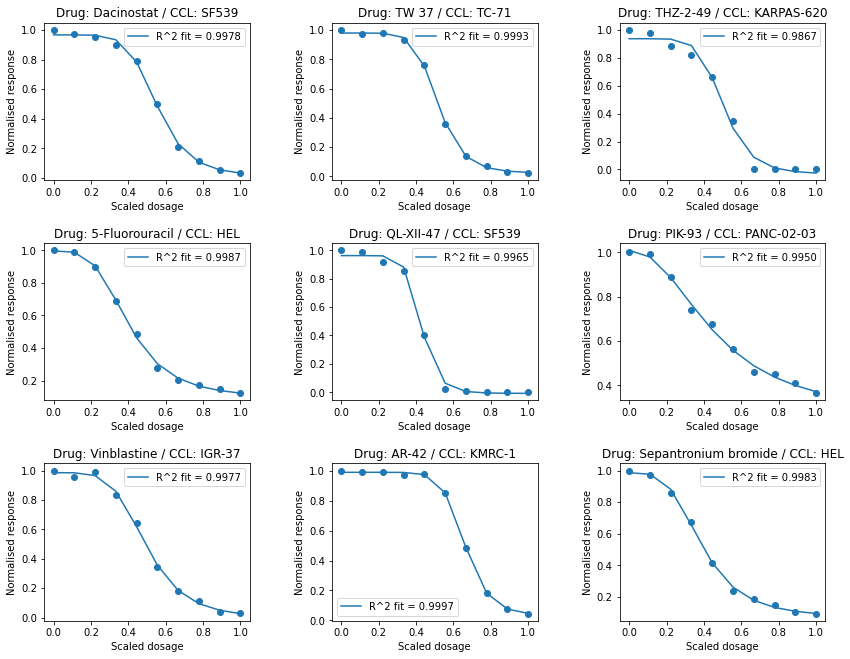

In [11]:
%%time
fitting_function = "ll4_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### ll4R_4_param

100%|██████████| 2583/2583 [00:07<00:00, 329.57it/s]


<function ll4R_4_param at 0x7f8971ace840>
R2>0: (2583, 44)
R2>0.9 2576
CPU times: user 8.03 s, sys: 269 ms, total: 8.3 s
Wall time: 8.21 s


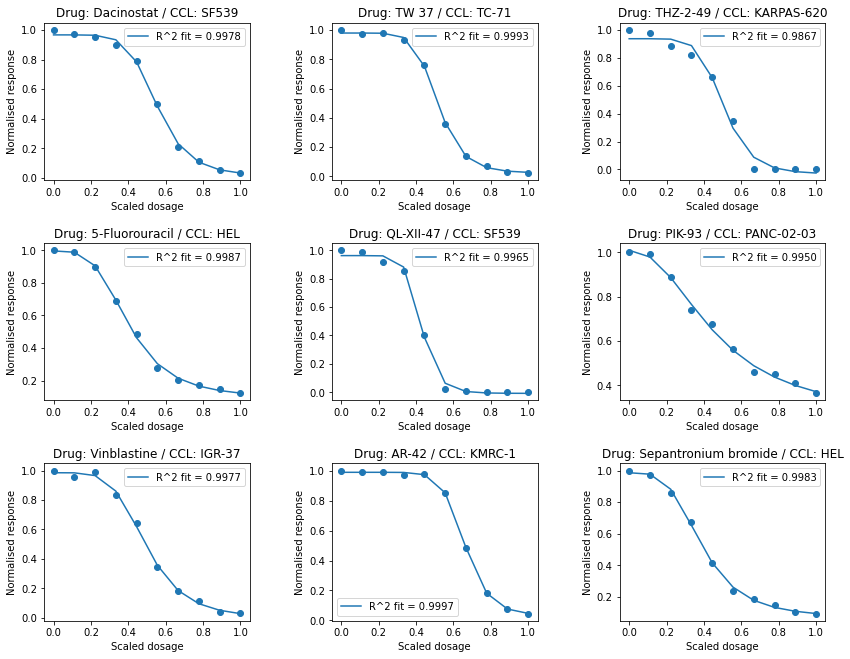

In [12]:
%%time
fitting_function = "ll4R_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

### logLogist_3_param

100%|██████████| 2552/2552 [00:03<00:00, 675.16it/s]


R2>0: (2552, 46)
R2>0.9 2549
CPU times: user 4.02 s, sys: 27.6 ms, total: 4.05 s
Wall time: 4.01 s


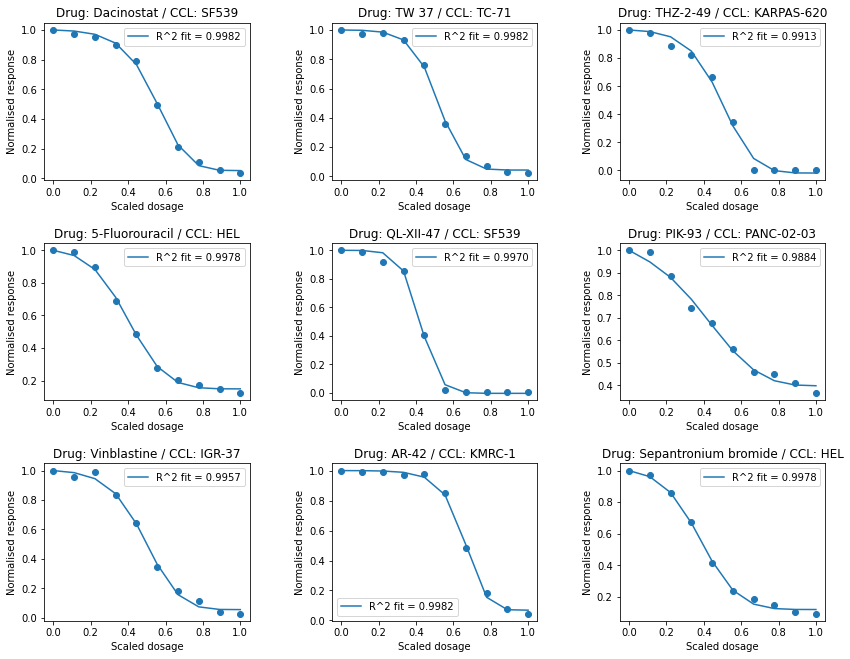

In [21]:
%%time
fitting_function = "logLogist_3_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]!=0]

print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
ShowResponseCurvesWithFitting(df, plots_in_row=3, plots_in_column=3, x_columns=conc_columns, y_columns = response_norm, 
                        indexes=df.index[:9],fitting_function = fitting_function, 
                                  fitting_parameters =fitting_function)

## Comparison of fitting models

In [22]:
functions = {"fsigmoid", 
             "sigmoid_2_param",
             "sigmoid_3_param",
             "sigmoid_4_param",
             "logistic_4_param",
            "ll4_4_param",
            "ll4R_4_param",
            "logLogist_3_param"}

functions_dict= dict(list(enumerate(functions)))
r2_columns = [fitting_function+"_r2" for fitting_function in functions]

In [23]:
df["better_fitting"] = np.argmax(df[r2_columns].values, axis=1)
r2_col_res = r2_columns +["better_fitting"]
df["better_fitting"] = df["better_fitting"].map(functions_dict)
df[r2_col_res].head()

,logistic_4_param_r2,sigmoid_4_param_r2,logLogist_3_param_r2,sigmoid_2_param_r2,ll4R_4_param_r2,ll4_4_param_r2,sigmoid_3_param_r2,fsigmoid_r2,better_fitting
0,0.997826,0.998878,0.998213,0.997226,0.997826,0.997826,0.997298,0.997226,sigmoid_4_param
1,0.999289,0.999030,0.998192,0.997156,0.999289,0.999289,0.997530,0.997156,logistic_4_param
2,0.986721,0.991203,0.991331,0.987712,0.986721,0.986721,0.990930,0.987712,logLogist_3_param
3,0.998696,0.998571,0.997779,0.966058,0.998696,0.998696,0.995511,0.966058,ll4_4_param
4,0.996546,0.997950,0.997028,0.996784,0.996546,0.996546,0.997449,0.996784,sigmoid_4_param


In [24]:
df["better_fitting"].value_counts()

sigmoid_4_param      1067
logLogist_3_param     741
logistic_4_param      275
ll4R_4_param          238
ll4_4_param           231
Name: better_fitting, dtype: int64

In [25]:
r2_limit = 0.98
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.98
sigmoid_4_param,2263
logistic_4_param,2245
ll4R_4_param,2245
ll4_4_param,2245
logLogist_3_param,2230
sigmoid_3_param,1820
sigmoid_2_param,1391
fsigmoid,1391


In [26]:
r2_limit = 0.95
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.95
logistic_4_param,2528
ll4R_4_param,2528
ll4_4_param,2528
logLogist_3_param,2516
sigmoid_4_param,2502
sigmoid_3_param,2384
sigmoid_2_param,2000
fsigmoid,2000


In [27]:
r2_limit = 0.9
fitted_samples = {}
for function in functions:
    fitted_samples[function] = df[df[function+"_r2"]> r2_limit].shape[0]

pd.DataFrame(fitted_samples.values(), index=fitted_samples.keys(), columns= ["fitted_samples R2>"+str(r2_limit)])\
            .sort_values("fitted_samples R2>"+str(r2_limit), ascending=False)

,fitted_samples R2>0.9
logistic_4_param,2552
ll4R_4_param,2552
ll4_4_param,2552
logLogist_3_param,2549
sigmoid_3_param,2534
sigmoid_4_param,2523
sigmoid_2_param,2334
fsigmoid,2334


In [29]:
df.to_csv("results/fit_1234.csv", index=False)